In [61]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'gender_submission.csv', 'test.csv']


In [143]:
# Learn from: https://www.kaggle.com/startupsci/titanic-data-science-solutions
# Import useful library 

# data analysis 
import random as rnd

# visualization 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

In [63]:
# load the data using Pandas dataframe
train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")

In [64]:
# combine these data to run operations on both of them 
combine = [train_df, test_df]

In [65]:
# Understand the dataset
# What features are in the dataset
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [66]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
# Categorical features: Sex, Embarked, Survived. Ordinal: Pclass
# Numerical features: PassengerId, Age, SibSp, Parch, Fare
# Mixed features: Ticket, Cabin. Alphabetical: Name

In [68]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [69]:
# May contain errors or typos: Name, Ticket 
# Missing data in train set: Cabin > Age > Embarked
# Missing data in test set: Cabin > Age
# Type of data
    # Integer: PassengerId, Survived (binary), Pclass (value 1, 2, 3), SibSp, Parch
    # Float: Age, Fare
    # Alphabetical: Name, Sex (can be converted to binary), Embarked (can be converted to integer values)
    # Mixed: Ticket

In [70]:
# Preview the data 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [71]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [72]:
# Getting the most basic statistic information from the data
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [73]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sjostedt, Mr. Ernst Adolf",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [74]:
# Comments on the above statistic info
    # The representative survival rate (from the training data) is ~ 38%
    # Most people (>75%) don't travel with parents/children (Parch ~ 0)
    # Nearly 30% of passengers had siblings and/or spouse aboard
    # Fares varied significantly with a few passengers pay as high as 512$
    # Few elderly passengers (<1%) within age range 65-80
    # Names are unique (count = unique = 891)
    # Sex variable as two possible values with 65% male (577/891)
    # Cabin has several duplicates or many passengers share cabin
    # Embarked takes 3 possible values with 72.4% S (644/889)
    # Ticket feature has 22% of duplicate values

In [75]:
# Analysis of feature correlation
# 1. Pivoting features against each other (can only do it for discrete features with no missing values)
# Only do that for Pclass, Sex, SibSp and Parch

In [76]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by='Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [77]:
train_df[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [78]:
train_df[['SibSp','Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by='Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [79]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index = False).mean().sort_values(by='Survived',ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [80]:
# Observation of analysis of feature correlation
    # Pclass = 1 has a high correlation to survived (>0.5) => include this feature
    # Sex = female has a higher chance to survive (0.74) => include this feature
    # SibSp and Parch had 0 correlation for extreme values (too large values) => might be better to derive a feature from these two features (creating new features)

In [81]:
# Analysis by visualizing data
    # Correlating numerical features: 
    # To understand correlation between numerical features and our solution, a histogram chart is helpful
    

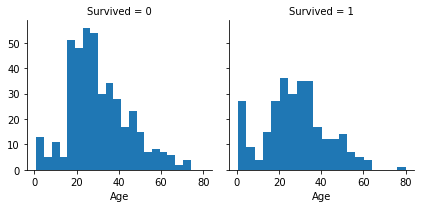

In [82]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins = 20)

In [83]:
# Observations:
    # Infants (< 4 years) had a higher chance of surviving
    # Oldest passenger survived
    # A large number of young people (15-40) did not survive
# => we should include Age feature, complete the missing values, and create band age groups

In [84]:
# Correlating numerical and ordinal features 
    # Combined multiple features for identifying correlations using a single plot.

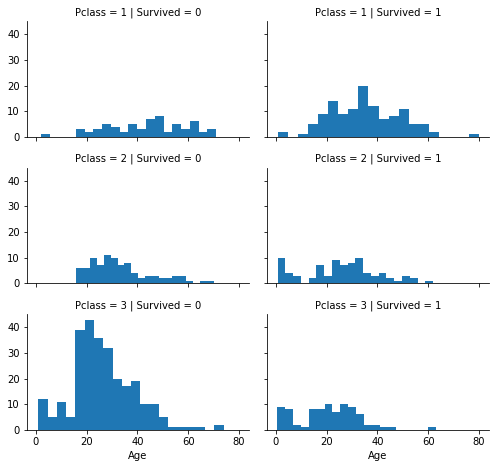

In [85]:
g = sns.FacetGrid(train_df, col='Survived', row='Pclass', height = 2.2, aspect=1.6)
g.map(plt.hist, 'Age', bins=20)


In [86]:
# Most 20-40 people are in pclass 3 and couldn't survive
# Most old (40-80) people are in pclass 1 and survive
# Infants in pclass 2 or 3 mostly survive
# => consider Pclass for model training

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


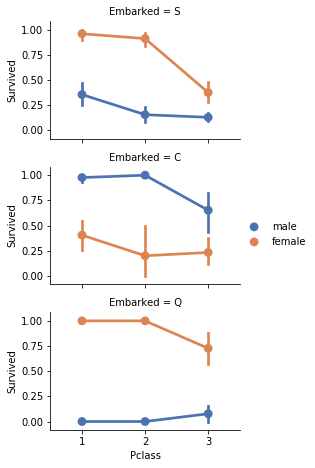

In [87]:
# Correlating categorical features with Survived
grid = sns.FacetGrid(train_df, row='Embarked', height = 2.2, aspect = 1.6)
grid.map(sns.pointplot,'Pclass', 'Survived','Sex', palette = 'deep')
grid.add_legend()

In [88]:
# Observations
    # Most female survived in general
    # At embarked S & Q, female was more likely to survive if she was in pclass 1 or 2
    # At embarked C, female was less likely to survive than male.
    # This could be a correlation between Embarked and Pclass and in turn Pclass and Survived, 
    # not necessarily direct correlation between Embarked and Survived
    # Ports of embarkation have varying survival rates for Pclass 3 and among male passengers

In [89]:
# Correlating categorical and numerical features
    # Correlate categorical features (with non-numeric values) and numeric features
    # Consider Embarked (categorical non-numeric), Sex (categorical non-numeric), 
    # Fare (numeric continuous), and Survived (categorical numeric)

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


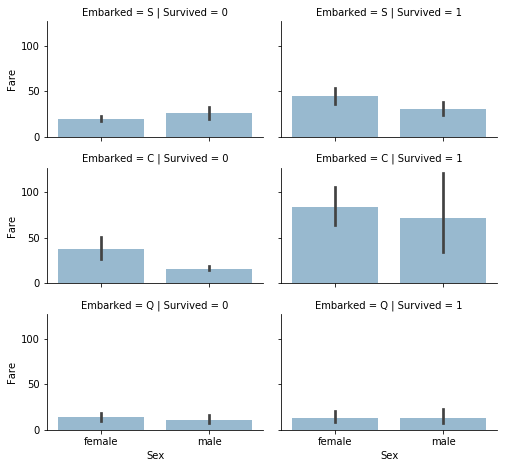

In [90]:
grid = sns.FacetGrid(train_df, row = 'Embarked', col = 'Survived', size = 2.2, aspect = 1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha = 0.5)
grid.add_legend()

In [91]:
# Observations
    # High fare correlates with survival
    # Port of embarktion correlates with survival rates

In [92]:
# Clean up the data
    # Decide to drop Cabin and Ticket features
print("Before dropping: ", "train_df size", train_df.shape, "test_df size", test_df.shape)
train_df = train_df.drop(['Ticket', 'Cabin'], axis = 1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis = 1)
combine = [train_df, test_df]
print("After dropping: ", "train_df size", train_df.shape, "test_df size", test_df.shape)
print("Combine shape ", combine[0].shape, combine[1].shape)

Before dropping:  train_df size (891, 12) test_df size (418, 11)
After dropping:  train_df size (891, 10) test_df size (418, 9)
Combine shape  (891, 10) (418, 9)


In [93]:
# Create new feature extracting from existing
    # Want to analyze whether Name feature can be engineered to extract titles and test correlation between titles and survival
    # before dropping Name and PassengerId features
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [94]:
# Refine the dataset
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col',\
                                                'Don', 'Dr', 'Major', 'Rev', 'Sir','Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train_df[['Title', 'Survived']].groupby(['Title'], as_index = False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [95]:
# Convert the categorical titles to ordinal
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [96]:
# Now drop the name feature from the dataset
train_df = train_df.drop(['Name', 'PassengerId'], axis = 1)
test_df = test_df.drop(['Name'], axis = 1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [97]:
#Converting categorical feature
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


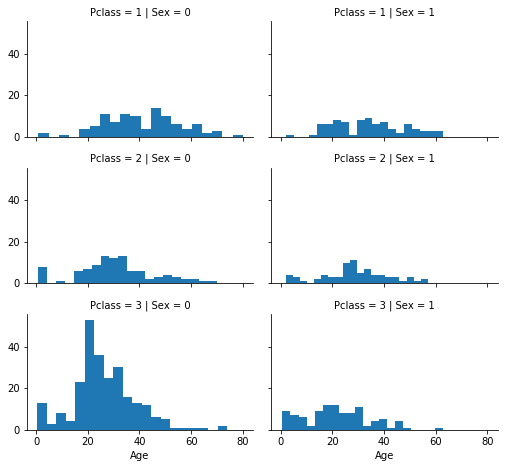

In [98]:
# Completing a numerical continuous feature
# Three simple ways
    # 1. Generate a random numbers between the mean and standard deviation
    # 2. More accurate way: use other correlated features. In our case we note correlation among
    # Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations
    # 3. Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and std, 
    # based on sets of Pclass and Gender combination
grid = sns.FacetGrid(train_df, row = 'Pclass', col = 'Sex', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', bins = 20)
grid.add_legend()


In [99]:
guess_ages = np.zeros((2,3))
for dataset in combine:
    for i in range(2):
        for j in range(3):
            guess_df = dataset[(dataset['Sex'] == 1) & \
                              (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            guess_ages[i,j] = int(age_guess/0.5 + 0.5)*0.5
            
    for i in range(2):
        for j in range(3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [100]:
# Create Age band and determine correlations with Survived
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index = False).mean().sort_values(by='AgeBand', ascending = True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [102]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [103]:
# Remove AgeBand feature
train_df = train_df.drop(['AgeBand'], axis = 1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [104]:
# Create new feature combining existing features
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean().sort_values(by='Survived', ascending = False)


,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [ ]:
# Observations
    # FamilySize does not correlate with Survived

In [105]:

# Create another feature for Single (or not)
for dataset in combine:
    dataset['Single']  = 0
    dataset.loc[dataset['FamilySize'] == 1, 'Single'] = 1
train_df[['Single', 'Survived']].groupby(['Single'], as_index = False).mean()

,Single,Survived
0,0,0.505650
1,1,0.303538


In [106]:
train_df = train_df.drop(['Parch','SibSp','FamilySize'], axis = 1)
test_df = test_df.drop(['Parch','SibSp','FamilySize'], axis = 1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Single
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [116]:
# Create an artificial feature combining Pclass and Age
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:,['Age*Class', 'Age','Pclass']].head(10)
#train_df.head()

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. We simply fill these with the most common occurance.

In [121]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [122]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [123]:
#Converting categorical feature to numeric
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Single,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [124]:
# Quick completing and converting a numeric feature
# Because Fare in test data is missing only one value, we can quickly fill in the blank by choosing the
# median fare
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace = True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Single,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [125]:
# We can now create FareBand
train_df['FareBand'] = pd.qcut(train_df['Fare'],4)
train_df[['FareBand','Survived']].groupby(['FareBand'], as_index = False).mean().sort_values(by='FareBand', ascending = True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [126]:
# Convert the Fare feature to ordinal values based on the FareBand
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 31), 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train_df = train_df.drop(['FareBand'], axis = 1)
combine = [train_df, test_df]
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Single,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [127]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Single,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


In [128]:
# Model, predict, and solve
# Supervised Learning for Classification/Regression purpose
# Logistic Regression
# KNN or k-Nearest Neighbors
# Support Vector Machines
# Naive Bayes classifier
# Decision Tree
# Random Forrest
# Perceptron
# Neural network
# Relevance Vector Machine 

In [129]:
X_train = train_df.drop("Survived", axis = 1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [130]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train)*100,2)
acc_log

80.36

In [131]:
# Use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals.
# This can be done by calculating the coefficient of the features in the decision function.
# Positive coefficients increase the log-odds of the response (and thus increase the probability)
# and negative coefficients decrease the log-odds of the response

In [133]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by = 'Correlation', ascending = False)


,Feature,Correlation
1,Sex,2.201527
5,Title,0.398234
2,Age,0.287163
4,Embarked,0.261762
6,Single,0.129140
3,Fare,-0.085150
7,Age*Class,-0.311200
0,Pclass,-0.749007


In [134]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train)*100,2)
acc_svc

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


83.84

In [135]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train)*100, 2)
acc_knn

84.74

In [136]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train)*100, 2)
acc_gaussian

72.28

In [137]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train)*100,2)
acc_perceptron

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


78.0

In [138]:
#Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train)*100,2)
acc_linear_svc

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


79.01

In [139]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train)*100, 2)
acc_sgd

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


76.88

In [140]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train)*100, 2)
acc_decision_tree

86.76

In [141]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train)*100,2)
acc_random_forest

86.76

In [142]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)


,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
0,Support Vector Machines,83.84
2,Logistic Regression,80.36
7,Linear SVC,79.01
5,Perceptron,78.00
6,Stochastic Gradient Decent,76.88
4,Naive Bayes,72.28


In [145]:
# Problem with looking only into training accuracy - overfitting
# Cross - validation
newX_train, X_cross, newY_train, Y_cross = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 0)
newX_train.shape, newY_train.shape

((712, 8), (712,))

In [146]:
X_cross.shape, Y_cross.shape

((179, 8), (179,))

In [148]:
"""
cross_validation_acc = []
for i in [logreg, coeff_df, svc, knn, gaussian, perceptron, linear_svc, sgd, decision_tree, random_forest]:
    cross_validation_acc.append(i.score(X_cross, Y_cross))
    
cross_val = pd.DataFrames({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': cross_validation_acc})
models.sort_values(by='Score', ascending = False)  
"""
    

"\ncross_validation_acc = []\nfor i in [logreg, coeff_df, svc, knn, gaussian, perceptron, linear_svc, sgd, decision_tree, random_forest]:\n    cross_validation_acc.append(i.score(X_cross, Y_cross))\n    \ncross_val = pd.DataFrames({\n    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', \n              'Random Forest', 'Naive Bayes', 'Perceptron', \n              'Stochastic Gradient Decent', 'Linear SVC', \n              'Decision Tree'],\n    'Score': cross_validation_acc})\nmodels.sort_values(by='Score', ascending = False)  \n"

In [151]:
logreg = LogisticRegression()
logreg.fit(newX_train, newY_train)
cross_acc_log = round(logreg.score(X_cross, Y_cross) * 100, 2)
cross_acc_log

75.98

In [152]:
svc = SVC()
svc.fit(newX_train, newY_train)
cross_acc_log = round(svc.score(X_cross, Y_cross)*100, 2)
cross_acc_log

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


79.33

In [153]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(newX_train, newY_train)
cross_acc_knn = round(knn.score(X_cross, Y_cross)*100, 2)
cross_acc_knn


82.12

In [154]:
gaussian = GaussianNB()
gaussian.fit(newX_train, newY_train)
cross_acc_gaussian = round(gaussian.score(X_cross, Y_cross)*100,2)
cross_acc_gaussian

73.74

In [155]:
perceptron = Perceptron()
perceptron.fit(newX_train, newY_train)
cross_acc_perceptron = round(perceptron.score(X_cross, Y_cross)*100,2)
cross_acc_perceptron

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


68.72

In [156]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
cross_acc_svc = round(linear_svc.score(X_cross, Y_cross)*100,2)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [157]:
sgd = SGDClassifier()
sgd.fit(newX_train, newY_train)
cross_acc_sgd = round(sgd.score(X_cross, Y_cross)*100,2)
cross_acc_sgd

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


71.51

In [159]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(newX_train, newY_train)
cross_acc_dt = round(decision_tree.score(X_cross, Y_cross)*100,2)
cross_acc_dt

83.24

In [160]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(newX_train, newY_train)
cross_acc_rf = round(random_forest.score(X_cross, Y_cross)*100,2)
cross_acc_rf


83.8